Chapter 10

# 截距为0的一元线性回归模型
《线性代数》 | 鸢尾花书：数学不难

这段代码完整地实现了**通过原点的一元线性回归模型**的建立、参数估计、误差分析与可视化。不同于带截距的线性模型，这里我们**显式地假设回归直线通过原点**，即没有常数项 $b_0$，模型形式是：

$$
\hat{y} = b_1 x
$$

从数学角度来看，我们的目标是：给定样本数据点 $(x_1, y_1), \dots, (x_n, y_n)$，在假设 $b_0 = 0$ 的前提下，找到一个斜率参数 $b_1$，使得预测值 $\hat{y}_i = b_1 x_i$ 尽可能接近实际观测值 $y_i$，即使得残差平方和最小。

---

设向量形式的自变量为 $X \in \mathbb{R}^{n \times 1}$，因变量为 $\boldsymbol{y} \in \mathbb{R}^{n \times 1}$，我们拟合的模型为：

$$
\hat{\boldsymbol{y}} = X b
$$

其中 $b \in \mathbb{R}^{1 \times 1}$ 是我们要求的斜率参数。最小二乘法的目标是最小化预测值与真实值之间的 $L^2$ 距离，即最小化下式：

$$
J(b) = \| \boldsymbol{y} - X b \|_2^2
$$

对 $b$ 求导并令导数为零，可得到最优解满足正规方程：

$$
X^\top X b = X^\top \boldsymbol{y}
$$

从而斜率 $b$ 的显式表达为：

$$
b = (X^\top X)^{-1} X^\top \boldsymbol{y}
$$

这是代码中使用 `np.linalg.inv(X.T @ X) @ X.T @ y` 这一行所求出的参数。

---

为了进一步理解这个过程，代码还分别打印或计算了：

- $X^\top X$：这个是**格拉姆矩阵（Gram matrix）**，本质上是 $x_i$ 自身的平方和；
- $X^\top \boldsymbol{y}$：输入与输出的“协变量积”，即 $\sum x_i y_i$；
- $(X^\top X)^{-1}$：格拉姆矩阵的逆，是参数计算中不可或缺的部分；
- 最终参数 $b$，表示最佳拟合斜率。

---

接着，代码构造了一个新的 $x$ 数值范围（从 0 到 10 的等距点），用于在该区间内生成预测值 $\hat{y}_{\text{new}} = b x_{\text{new}}$，从而可以绘制一条完整的回归直线。

训练集上的预测值则为：

$$
\hat{\boldsymbol{y}} = X b
$$

预测误差向量为：

$$
\boldsymbol{e} = \boldsymbol{y} - \hat{\boldsymbol{y}}
$$

并进一步计算其 $L^2$ 范数的平方：

$$
\|\boldsymbol{e}\|_2^2 = \boldsymbol{e}^\top \boldsymbol{e}
$$

这个值即为残差平方和（Residual Sum of Squares, RSS），用于衡量拟合效果的好坏，越小代表模型预测越精确。

---

在可视化部分，代码通过以下方式直观展现了模型：

- 蓝色叉点 (`x`) 表示原始观测数据 $(x_i, y_i)$；
- 红色直线是预测函数 $\hat{y} = b x$ 在 $[0, 10]$ 区间上的图像；
- 红色叉点是训练集上预测值 $(x_i, \hat{y}_i)$；
- 每个样本的预测值与真实值之间的橙色线段表示误差（残差）；
- 图像添加了坐标轴标签、网格与等比例比例尺，美观且清晰。

---

总之，这段代码展示的是**不含截距项的最小二乘回归**，数学上简洁，直观上表现为一条穿过原点的最佳拟合直线，通过矩阵计算与可视化清楚地揭示了误差最小化的几何含义。如果需要，我还可以对比它与带截距模型的差异。是否继续？

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 数据

In [6]:
x = np.array([1,2,3,5,6,7,8,9]).reshape(-1,1)   # 自变量 x
y = np.array([3,1,4,6,5,8,7,8]).reshape(-1,1)   # 因变量 y

In [7]:
# 构造设计矩阵，截距项为0，不需要全1列向量
X = x

## 计算参数

In [9]:
b = np.linalg.inv(X.T @ X) @ X.T @ y
b

array([[0.97026022]])

In [10]:
# 格拉姆矩阵
X.T @ X

array([[269]])

In [11]:
# 格拉姆矩阵的逆
np.linalg.inv(X.T @ X)

array([[0.00371747]])

In [12]:
X.T @ y

array([[261]])

## 计算预测值

In [17]:
x_array = np.linspace(0,10).reshape(-1,1)
X_array = x_array

y_array_pred = X_array @ b
y_pred = X @ b

## 误差向量

In [19]:
error = y - y_pred
error

array([[ 2.02973978],
       [-0.94052045],
       [ 1.08921933],
       [ 1.14869888],
       [-0.82156134],
       [ 1.20817844],
       [-0.76208178],
       [-0.73234201]])

In [21]:
# 误差向量的L2范数的平方
error.T @ error

array([[10.76208178]])

## 可视化

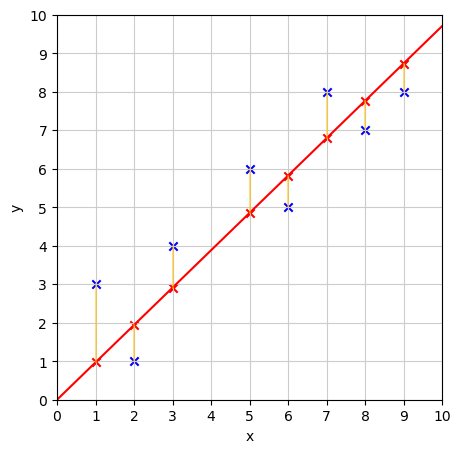

In [23]:
fig, ax = plt.subplots(figsize=(5,5))

# 绘制样本数据
ax.scatter(x, y, marker = 'x', color = 'b')

# 绘制回归直线
ax.plot(x_array, y_array_pred, color='r')

# 绘制预测值
ax.scatter(x, y_pred, marker = 'x', color='r')

# 绘制误差
ax.plot(([i for i in x.squeeze()], [i for i in x.squeeze()]),
        ([j for j in y_pred.squeeze()], [j for j in y.squeeze()]),
         c='#FFC000', alpha = 0.5)

# 装饰
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xticks(np.arange(11))
ax.set_yticks(np.arange(11))
ax.grid(True, c = '0.8')
ax.set_aspect('equal', 'box')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  